In [1]:
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
importlib.reload(kgs);

local
local


In [2]:
%%time
train_data = kgs.load_all_train_data()
test_data = kgs.load_all_test_data()
len(train_data), len(test_data)

CPU times: user 434 ms, sys: 138 ms, total: 572 ms
Wall time: 1.65 s


(1100, 1)

0.1
enable
-np.inf
enable
0.1
enable
-np.inf
enable
(67500, 32, 32) 0
(67500, 32, 32) 0
(5625, 32, 282) 0
(1350, 32, 32) (1125, 16, 282) [[[-1.80564601  4.97982577]
  [ 1.62752261 -1.09132085]]

 [[-1.3583801  -3.40169364]
  [ 5.99246912 -1.22753272]]] [[[132.84156875 168.73013759]
  [235.19794276 273.4094409 ]]

 [[128.239467   141.54037125]
  [238.89142591 258.03825931]]]
CPU times: user 2.24 s, sys: 710 ms, total: 2.95 s
Wall time: 1.77 s


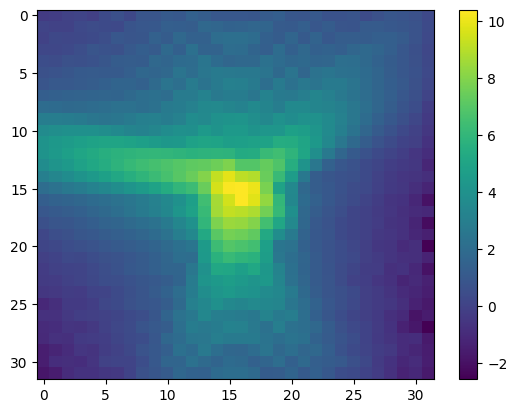

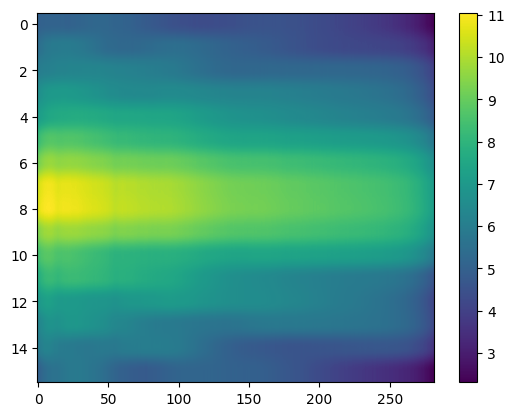

In [58]:
%%time
import ariel_load
import copy
kgs.profiling=False
importlib.reload(ariel_load)
loaders = ariel_load.default_loaders()
d = copy.deepcopy(train_data[0])
d.transits[0].load_to_step(4, d, loaders)
print(d.transits[0].data[0].data.shape, d.transits[0].data[1].data.shape, d.transits[0].data[0].data[:2,:2,:2], d.transits[0].data[1].data[:2,:2,:2])
plt.figure()
plt.imshow(np.log(np.mean(d.transits[0].data[0].data.get(), axis=0)),aspect='auto')
plt.colorbar()
plt.figure()
plt.imshow(np.log(np.mean(d.transits[0].data[1].data.get(), axis=0)),aspect='auto')
plt.colorbar()
#d.transits[0].load_to_step(0,d,loaders)
#d.transits[0].data[0]
#ref = kgs.dill_load(kgs.temp_dir + '/ref.pickle')
#assert cp.array_equal(ref[0].data, d.transits[0].data[0].data, equal_nan=True)
#assert cp.array_equal(ref[1].data, d.transits[0].data[1].data, equal_nan=True)

0.1
enable
-np.inf
enable
0.1
enable
-np.inf
enable
(67500, 32, 32) 0
(67500, 32, 32) 0
(5625, 32, 282) 0
(1350, 1) (375, 282)


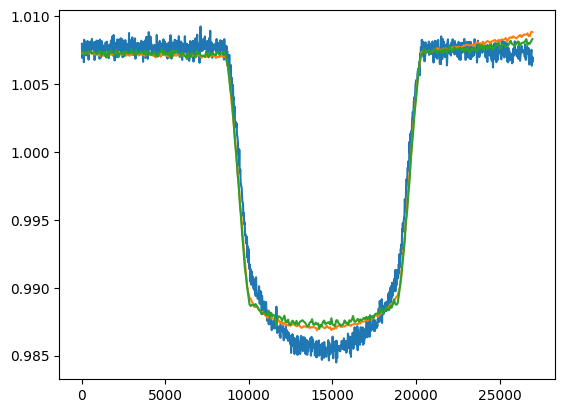

0.1
enable
-np.inf
enable
0.1
enable
-np.inf
enable
(67500, 32, 32) 0
(67500, 32, 32) 0
(5625, 32, 282) 0
(1350, 1) (375, 282)


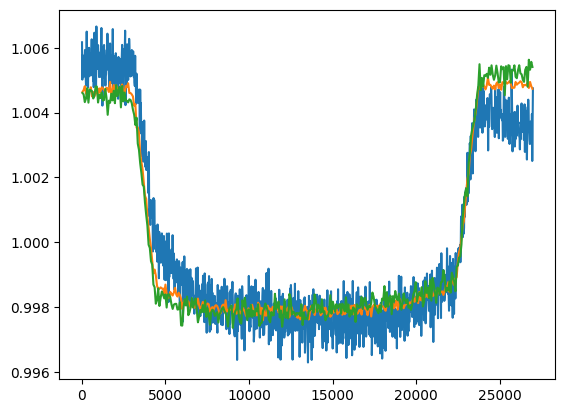

0.1
enable
-np.inf
enable
0.1
enable
-np.inf
enable
(67500, 32, 32) 0
(67500, 32, 32) 0
(5625, 32, 282) 0
(1350, 1) (375, 282)


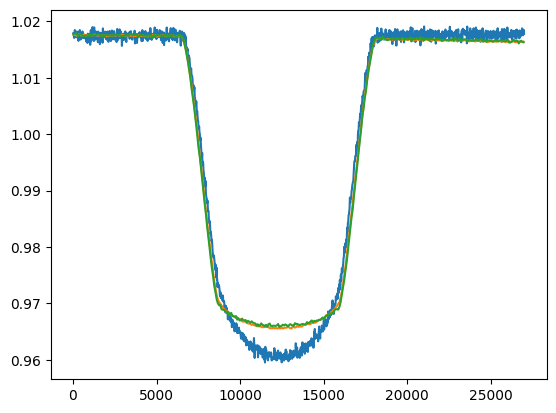

0.1
enable
-np.inf
enable
0.1
enable
-np.inf
enable
(67500, 32, 32) 0
(67500, 32, 32) 0
(5625, 32, 282) 0
(1350, 1) (375, 282)


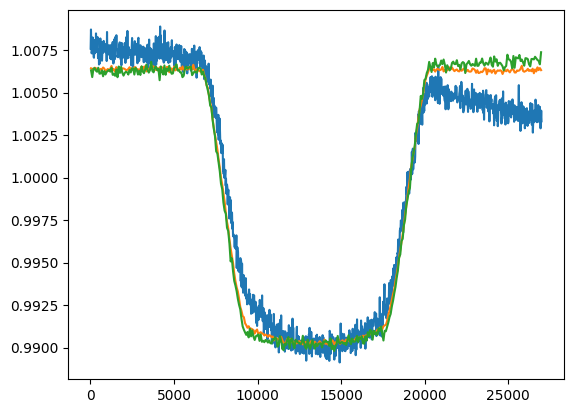

0.1
enable
-np.inf
enable
0.1
enable
-np.inf
enable
(67500, 32, 32) 0
(67500, 32, 32) 0
(5625, 32, 282) 0
(1350, 1) (375, 282)


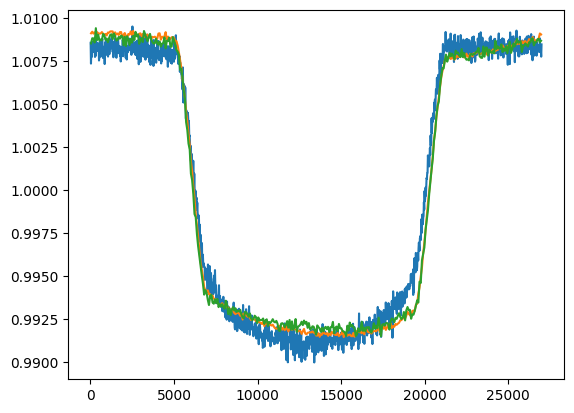

0.1
enable
-np.inf
enable
0.1
enable
-np.inf
enable
(67500, 32, 32) 0
(67500, 32, 32) 0
(5625, 32, 282) 0
(1350, 1) (375, 282)


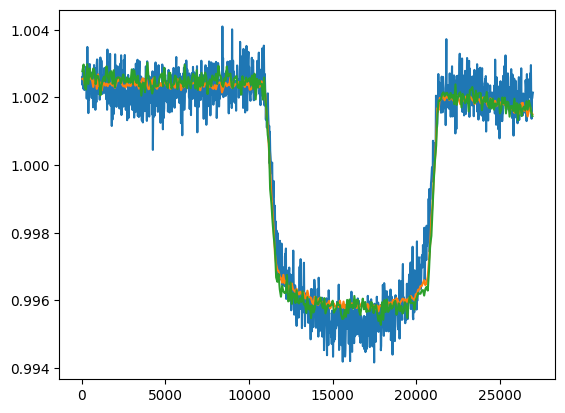

0.1
enable
-np.inf
enable
0.1
enable
-np.inf
enable
(67500, 32, 32) 0
(67500, 32, 32) 0
(5625, 32, 282) 0
(1350, 1) (375, 282)


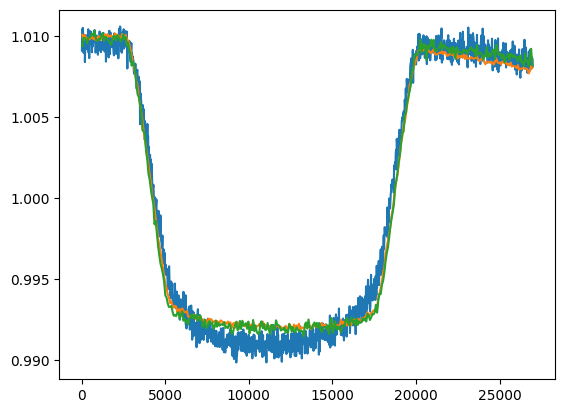

0.1
enable
-np.inf
enable
0.1
enable
-np.inf
enable
(67500, 32, 32) 0
(67500, 32, 32) 0
(5625, 32, 282) 0
(1350, 1) (375, 282)


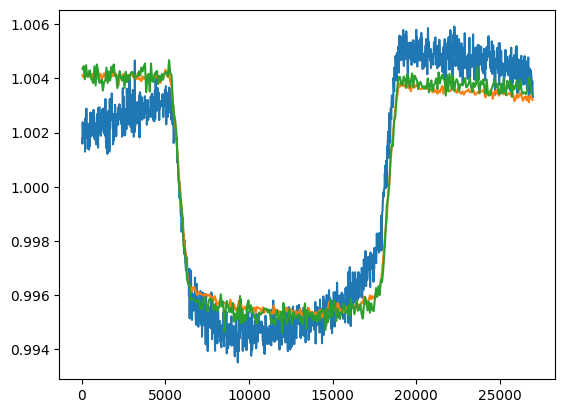

0.1
enable
-np.inf
enable
0.1
enable
-np.inf
enable
(67500, 32, 32) 0
(67500, 32, 32) 0
(5625, 32, 282) 0
(1350, 1) (375, 282)


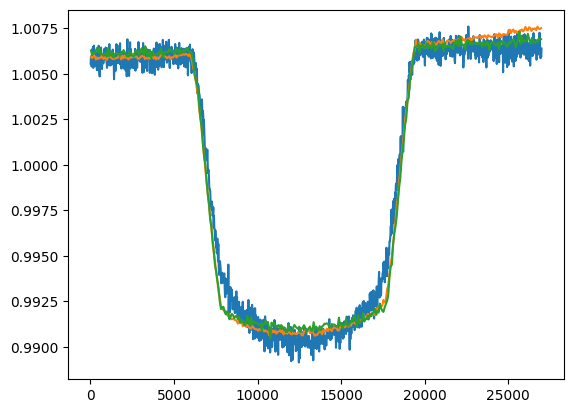

0.1
enable
-np.inf
enable
0.1
enable
-np.inf
enable
(67500, 32, 32) 0
(67500, 32, 32) 0
(5625, 32, 282) 0
(1350, 1) (375, 282)


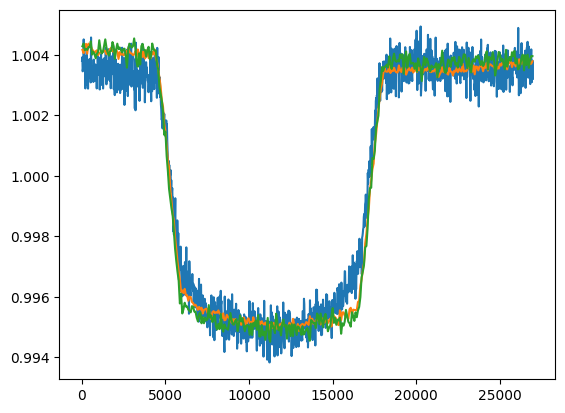

0.1
enable
-np.inf
enable
0.1
enable
-np.inf
enable
(67500, 32, 32) 0
(67500, 32, 32) 0
(5625, 32, 282) 0
(1350, 1) (375, 282)


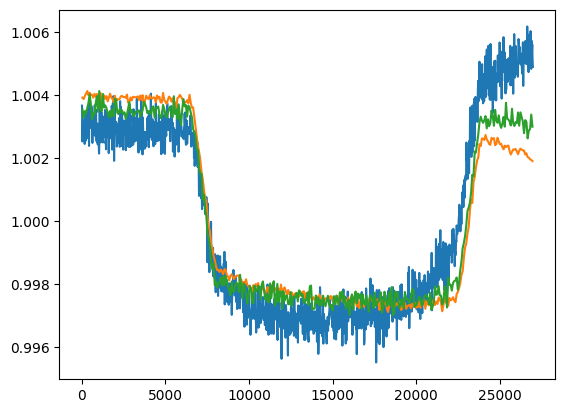

0.1
enable
-np.inf
enable
0.1
enable
-np.inf
enable
(67500, 32, 32) 0
(67500, 32, 32) 0
(5625, 32, 282) 0
(1350, 1) (375, 282)


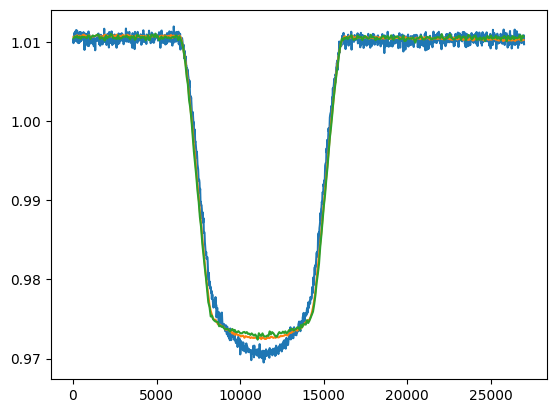

0.1
enable
-np.inf
enable
0.1
enable
-np.inf
enable
(67500, 32, 32) 0
(67500, 32, 32) 0
(5625, 32, 282) 0
(1350, 1) (375, 282)


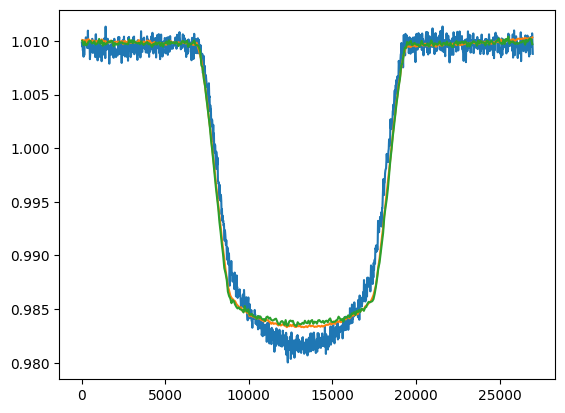

0.1
enable
-np.inf
enable
0.1
enable
-np.inf
enable
(67500, 32, 32) 0
(67500, 32, 32) 0
(5625, 32, 282) 0
(1350, 1) (375, 282)


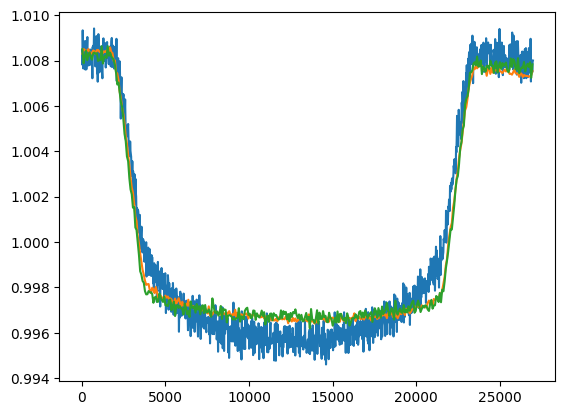

0.1
enable
-np.inf
enable
0.1
enable
-np.inf
enable
(67500, 32, 32) 0
(67500, 32, 32) 0
(5625, 32, 282) 0
(1350, 1) (375, 282)


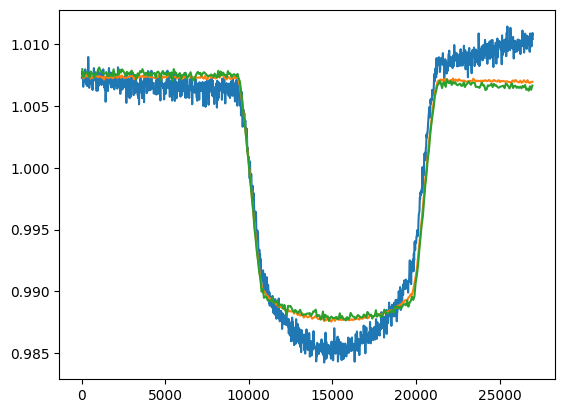

0.1
enable
-np.inf
enable
0.1
enable
-np.inf
enable
(67500, 32, 32) 0
(67500, 32, 32) 0
(5625, 32, 282) 0
(1350, 1) (375, 282)


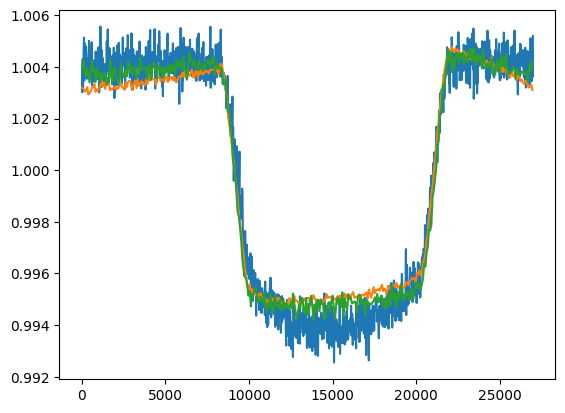

0.1
enable
-np.inf
enable
0.1
enable
-np.inf
enable
(67500, 32, 32) 0
(67500, 32, 32) 0
(5625, 32, 282) 0
(1350, 1) (375, 282)


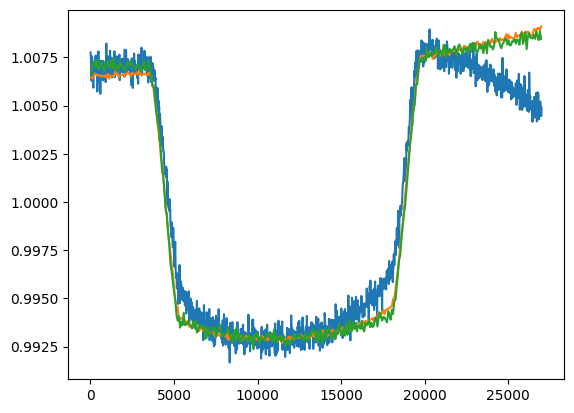

0.1
enable
-np.inf
enable
0.1
enable
-np.inf
enable
(67500, 32, 32) 0
(67500, 32, 32) 0
(5625, 32, 282) 0
(1350, 1) (375, 282)


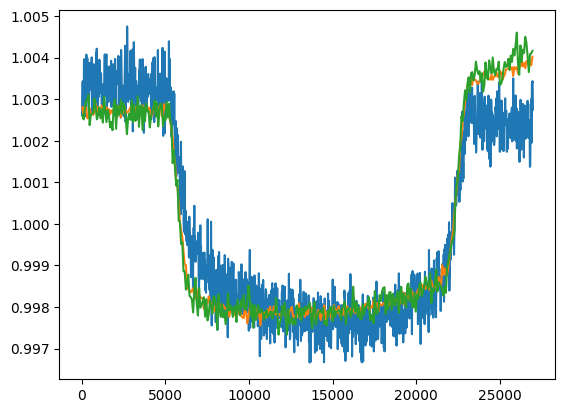

0.1
enable
-np.inf
enable
0.1
enable
-np.inf
enable
(67500, 32, 32) 0
(67500, 32, 32) 0
(5625, 32, 282) 0
(1350, 1) (375, 282)


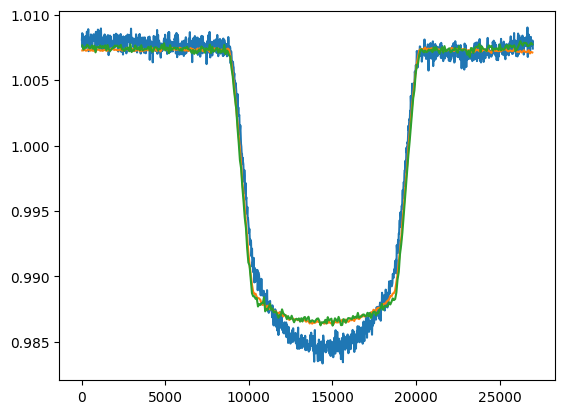

0.1
enable
-np.inf
enable
0.1
enable
-np.inf
enable
(67500, 32, 32) 0
(67500, 32, 32) 0
(5625, 32, 282) 0
(1350, 1) (375, 282)


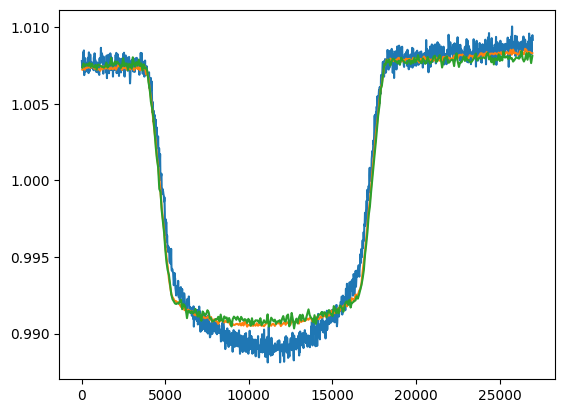

CPU times: user 39.8 s, sys: 13.4 s, total: 53.2 s
Wall time: 26.4 s


In [78]:
%%time
import ariel_load
import copy
kgs.profiling=False
importlib.reload(ariel_load)
loaders = ariel_load.default_loaders()
loaders[1].apply_time_binning.time_binning *= 3
for ii in range(20):
    d = copy.deepcopy(train_data[ii])
    d.transits[0].load_to_step(5, d, loaders)
    print(d.transits[0].data[0].data.shape, d.transits[0].data[1].data.shape)
    plt.figure()
    plt.plot(d.transits[0].data[0].times.get(),d.transits[0].data[0].data.get()/np.mean(d.transits[0].data[0].data.get()))
    plt.plot(d.transits[0].data[1].times.get(),np.mean(d.transits[0].data[1].data[:,:141].get(),1)/np.mean(d.transits[0].data[1].data[:,:141].get()))
    plt.plot(d.transits[0].data[1].times.get(),np.mean(d.transits[0].data[1].data[:,141:].get(),1)/np.mean(d.transits[0].data[1].data[:,141:].get()))
    #plt.plot(cp.mean(d.transits[0].data[1].data.get(),1))
    #plt.figure()
    #plt.imshow(d.transits[0].data[1].data.get(), aspect='auto')
    #plt.figure()
    #plt.imshow((d.transits[0].data[1].data - cp.mean(d.transits[0].data[1].data,0)).get(), aspect='auto')
    plt.pause(0.0001)
#d.transits[0].load_to_step(0,d,loaders)
#d.transits[0].data[0]
#ref = kgs.dill_load(kgs.temp_dir + '/ref.pickle')
#assert cp.array_equal(ref[0].data, d.transits[0].data[0].data, equal_nan=True)
#assert cp.array_equal(ref[1].data, d.transits[0].data[1].data, equal_nan=True)

In [61]:
%debug

> /mnt/d/ariel2/code/core/kaggle_support.py(407)_check_constraints()
    405 
    406         if self.loading_step==5:
--> 407             assert(self.wavelengths.shape == (self.data.shape[1],))
    408         elif self.loading_step>=1 and not self.is_FGS:
    409             assert(self.wavelengths.shape == (self.data.shape[2],))



ipdb>  self.wavelengths.shape


()


ipdb>  self


SensorData(is_FGS=True, loading_step=5, data=array([[336914.79208429],
       [336564.93991541],
       [336590.4139452 ],
       ...,
       [336494.23291101],
       [336586.33963406],
       [336483.15681318]]), times=array([9.950000e+00, 2.995000e+01, 4.995000e+01, ..., 2.694995e+04,
       2.696995e+04, 2.698995e+04]), time_intervals=array([10., 10., 10., ..., 10., 10., 10.]), wavelengths=array(0.7))


ipdb>  self.wavelengths


array(0.7)


ipdb>  self.wavelengths.shape


()


ipdb>  q


(1, 2, 5) 0


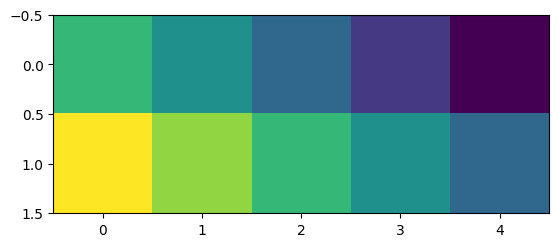

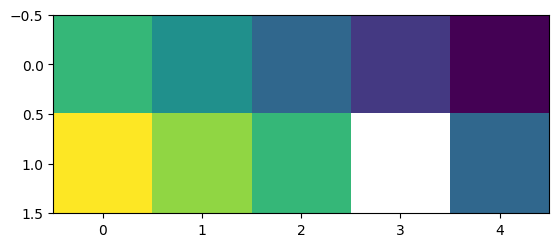

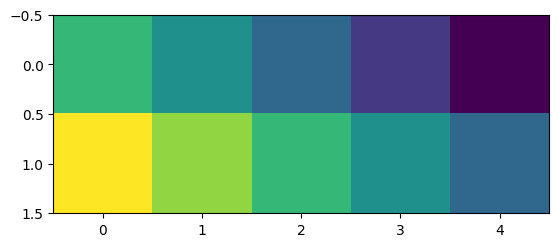

In [53]:
test_mat = cp.array([ [[0,1,2,3,4],[2,3,4,5,6]] ], dtype=cp.float64)
test_mat = cp.flip(test_mat, axis=2)
plt.figure()
plt.imshow(test_mat[0,...].get())
test_mat[0,1,3] = cp.nan
plt.figure()
plt.imshow(test_mat[0,...].get())
ariel_load.inpaint_vectorized(test_mat)
plt.figure()
plt.imshow(test_mat[0,...].get())

In [23]:
d.transits[0].data[1].wavelengths

array([1.95176069, 1.96061203, 1.96944955, 1.97827324, 1.9870831 ,
       1.99587914, 2.00466134, 2.01342973, 2.02218428, 2.03092501,
       2.03965191, 2.04836498, 2.05706423, 2.06574965, 2.07442124,
       2.083079  , 2.09172294, 2.10035305, 2.10896934, 2.1175718 ,
       2.12616043, 2.13473523, 2.14329621, 2.15184336, 2.16037668,
       2.16889618, 2.17740185, 2.18589369, 2.1943717 , 2.20283589,
       2.21128625, 2.21972279, 2.2281455 , 2.23655438, 2.24494943,
       2.25333066, 2.26169806, 2.27005163, 2.27839138, 2.28671729,
       2.29502939, 2.30332765, 2.31161209, 2.3198827 , 2.32813948,
       2.33638244, 2.34461157, 2.35282688, 2.36102835, 2.369216  ,
       2.37738982, 2.38554982, 2.39369599, 2.40182833, 2.40994684,
       2.41805153, 2.42614239, 2.43421943, 2.44228263, 2.45033201,
       2.45836757, 2.46638929, 2.47439719, 2.48239126, 2.49037151,
       2.49833793, 2.50629052, 2.51422928, 2.52215422, 2.53006533,
       2.53796262, 2.54584607, 2.5537157 , 2.5615715 , 2.56941

In [5]:
np.max(np.abs([d.e for d in test_data]))

0.0